In [12]:
library(ggplot2)

In [2]:
df0 = read.csv("/hps/nobackup/stegle/users/acuomo/all_scripts/sc_neuroseq/eqtl/all_leads_5pct_FDR.csv")
head(df0,2)

snp_id,p_value,beta,beta_se,empirical_feature_p_value,feature_chromosome,feature_start,feature_end,n_samples,n_e_samples,...,beta_param,snp_chromosome,snp_position,assessed_allele,call_rate,maf,hwe_p,feature_id,global_corr_p_value,label
21_30373541_T_C,2.920966e-25,-0.8525780,0.08210206,1.632719e-14,21,30376705,30391699,173,173,...,192.39730,21,30373541,C,1,0.2398844,0.09609073,ENSG00000156253,1.400559e-12,FPP_D11
21_30432557_G_A,1.495486e-48,0.5058675,0.03454695,1.169470e-31,21,30428126,30446118,173,173,...,34.96152,21,30432557,A,1,0.1358382,1.00000000,ENSG00000156261,1.059433e-28,FPP_D11


In [3]:
# df0$label = c()
# df0$label = as.character(df0$new_label)
# df0$new_label = c()

In [4]:
# df0$label[df0$label == 'DA_ROT_D52'] = 'DA_D52_ROT'
# df0$label[df0$label == 'Sert_ROT_D52'] = 'Sert_D52_ROT'
# df0$label[df0$label == 'Epen1_ROT_D52'] = 'Epen1_D52_ROT'
# df0$label[df0$label == 'Astro_ROT_D52'] = 'Astro_D52_ROT'

In [5]:
unique(df0$label)

[1] FPP_D11       P_FPP_D11     DA_D30        Sert_D30      Epen1_D30    
 [6] FPP_D30       DA_D52        Sert_D52      Epen1_D52     Astro_D52    
[11] DA_D52_ROT    Sert_D52_ROT  Epen1_D52_ROT Astro_D52_ROT
14 Levels: Astro_D52 Astro_D52_ROT DA_D30 DA_D52 DA_D52_ROT ... Sert_D52_ROT

In [6]:
# write.csv(df0,"/hps/nobackup/stegle/users/acuomo/all_scripts/sc_neuroseq/eqtl/all_leads_5pct_FDR.csv", quote = F, row.names = F)
# head(df0,2)

In [7]:
df1 = read.csv("/hps/nobackup/stegle/users/acuomo/all_scripts/sc_neuroseq/eqtl/results_no_ncell_noisematrix_5pct_FDR.csv")
head(df1)

snp_id,p_value,beta,beta_se,empirical_feature_p_value,feature_chromosome,feature_start,feature_end,n_samples,n_e_samples,...,beta_param,snp_chromosome,snp_position,assessed_allele,call_rate,maf,hwe_p,feature_id,global_corr_p_value,label
19_54613420_G_A,6.593078e-09,0.2373437,0.04091446,1.587931e-04,19,54610320,54619055,155,155,...,243.43407,19,54613420,A,1,0.2129032,0.3402231,ENSG00000105619,0.0032559122,FPP_D11
19_54612628_A_G,3.096059e-08,-0.1844164,0.03331271,1.294388e-03,19,54606036,54612564,155,155,...,185.04975,19,54612628,G,1,0.2483871,0.5221240,ENSG00000170906,0.0189964365,FPP_D11
10_5849917_C_G,1.567224e-10,-0.1344808,0.02101696,6.572612e-05,10,5807186,5884095,155,155,...,226.43617,10,5849917,G,1,0.2290323,1.0000000,ENSG00000057608,0.0015022036,FPP_D11
10_11841338_A_G,9.338738e-10,0.5059866,0.08267321,1.032367e-04,10,11784365,11806069,155,155,...,229.45673,10,11841338,G,1,0.3548387,1.0000000,ENSG00000134463,0.0022315697,FPP_D11
10_12113269_A_T,8.422984e-09,0.6241120,0.10835715,6.475926e-04,10,12110971,12165224,155,155,...,277.38874,10,12113269,T,1,0.1000000,0.1770887,ENSG00000181192,0.0108276184,FPP_D11
17_27907313_A_G,5.344373e-10,0.5046050,0.08127459,1.675374e-05,17,27893070,27900175,155,155,...,35.29385,17,27907313,G,1,0.2870968,0.0100465,ENSG00000167543,0.0004416694,FPP_D11


In [8]:
# df1 = df1[df1$global_corr_p_value < 0.05,]

In [9]:
df = data.frame()
labels = unique(df1$label)
for (label in labels){
    n1 = nrow(df1[df1$label == label,])
    n2 = nrow(df0[df0$label == label,])
    df = rbind(df, data.frame(label = label, egenes = n1, model = 'base_model'),
                   data.frame(label = label, egenes = n2, model = 'ncell_model'))
}

In [10]:
head(df)

label,egenes,model
FPP_D11,822,base_model
FPP_D11,1784,ncell_model
P_FPP_D11,1155,base_model
P_FPP_D11,1802,ncell_model
FPP_D30,248,base_model
FPP_D30,618,ncell_model


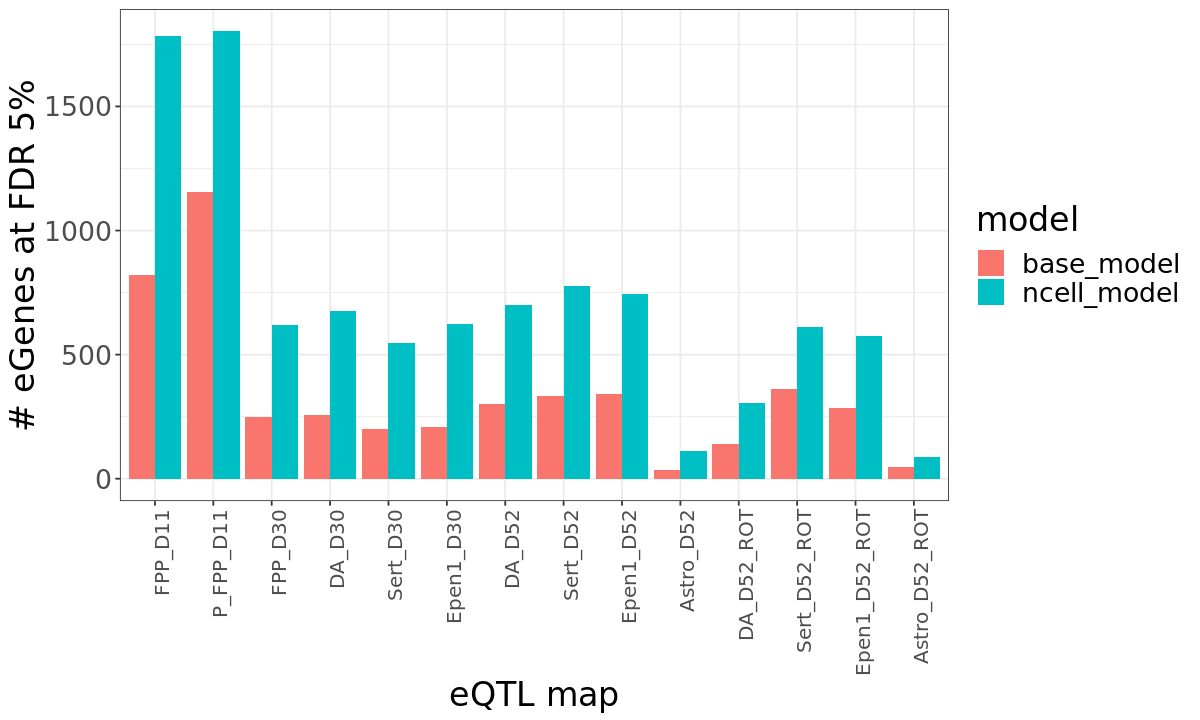

In [11]:
options(repr.plot.width=10, repr.plot.height=6)
ggplot(df, aes(x = label, y = egenes, fill = model)) + 
    geom_bar(stat = "identity", position = 'dodge') + 
    ylab("# eGenes at FDR 5%") + xlab("eQTL map") + theme_bw() + 
    theme(axis.text.x = element_text(angle = 90, hjust = 1, size = 12), text = element_text(size=20))